# Python 🐍

Utilizziamo **Python** e la libreria **PIL/Pillow** per colorare manualmente le immagini basandosi sulla posizione dei pixel e su regole predefinite.

**Caratteristiche:**
- Colorazione basata su coordinate e luminanza dei pixel
- Approccio deterministico e controllabile
- Ideale per comprendere i fondamenti dell'elaborazione immagini
- Non richiede training di modelli

In [ ]:

from PIL import Image
import math

def colora_vista_porto_messina(percorso_immagine_bn, percorso_immagine_colorata):
    """
    Colora manualmente la foto storica del porto di Messina con il battello a vapore.
    Approccio completamente manuale basato sulla posizione dei pixel.
    """
    try:
        # Apri l'immagine in bianco e nero
        img_bn = Image.open(percorso_immagine_bn)

        # Converti l'immagine in modalità RGB per poter aggiungere colori
        img_colorata = img_bn.convert("RGB")

        # Ottieni le dimensioni dell'immagine
        width, height = img_colorata.size

        print(f"📏 Dimensioni immagine: {width}x{height}")
        print("🎨 Inizio colorazione manuale...")

        # === FASE 1: COLORAZIONE DEL CIELO (30% superiore) ===
        print("1 > Colorando il cielo...")
        for x in range(width):
            for y in range(0, int(height * 0.30)):
                r, g, b = img_colorata.getpixel((x, y))
                luminance = (0.299 * r + 0.587 * g + 0.114 * b)

                # Gradiente verticale per il cielo (più scuro in alto, più chiaro verso l'orizzonte)
                sky_factor = y / (height * 0.30)

                if luminance > 180:  # Nuvole chiare
                    # Bianco-grigio per le nuvole
                    gray_value = int(230 + sky_factor * 20)
                    img_colorata.putpixel((x, y), (gray_value, gray_value, gray_value))
                elif luminance > 100:  # Cielo medio
                    # Azzurro che sfuma verso il grigio
                    blue = int(180 - sky_factor * 30)
                    img_colorata.putpixel((x, y), (int(blue * 0.7), int(blue * 0.8), blue))
                else:  # Parti scure del cielo
                    # Grigio-blu scuro
                    img_colorata.putpixel((x, y), (100, 110, 130))

        # === FASE 2: COLORAZIONE DEI MONTI PELORITANI (sfondo, 25-40% dell'altezza) ===
        print("2 > Colorando i Monti Peloritani...")
        for x in range(width):
            for y in range(int(height * 0.25), int(height * 0.40)):
                r, g, b = img_colorata.getpixel((x, y))
                luminance = (0.299 * r + 0.587 * g + 0.114 * b)

                # I monti dovrebbero avere toni marroni-verdi
                if luminance < 150:
                    # Sfumature di verde-marrone per la vegetazione montana
                    distance_factor = (y - height * 0.25) / (height * 0.15)
                    green = int(80 + distance_factor * 40)
                    brown = int(70 + distance_factor * 30)
                    img_colorata.putpixel((x, y), (brown, green, int(brown * 0.8)))

        # === FASE 3: COLORAZIONE DELLA PALAZZATA (edifici lungo il porto) ===
        print("3 > Colorando la Palazzata...")
        for x in range(width):
            for y in range(int(height * 0.35), int(height * 0.50)):
                r, g, b = img_colorata.getpixel((x, y))
                luminance = (0.299 * r + 0.587 * g + 0.114 * b)

                # Gli edifici storici italiani sono spesso color crema/beige/ocra
                if luminance > 120 and luminance < 220:
                    # Varia leggermente il colore per dare profondità
                    variation = (x % 50) / 50.0  # Crea variazione orizzontale
                    beige_r = int(220 + variation * 20)
                    beige_g = int(200 + variation * 15)
                    beige_b = int(170 + variation * 10)
                    img_colorata.putpixel((x, y), (beige_r, beige_g, beige_b))
                elif luminance > 80:  # Ombre degli edifici
                    img_colorata.putpixel((x, y), (150, 140, 120))

        # === FASE 4: COLORAZIONE DEL MARE/STRETTO ===
        print("4 > Colorando lo Stretto di Messina...")
        for x in range(width):
            for y in range(int(height * 0.45), int(height * 0.85)):
                r, g, b = img_colorata.getpixel((x, y))
                luminance = (0.299 * r + 0.587 * g + 0.114 * b)

                # Evita di colorare il battello (parte sinistra-centro)
                is_boat_area = (x > width * 0.05 and x < width * 0.45 and
                               y > height * 0.55 and y < height * 0.80)

                # Evita la nave a vela (parte destra)
                is_ship_area = (x > width * 0.70 and x < width * 0.95 and
                               y > height * 0.40 and y < height * 0.65)

                if not is_boat_area and not is_ship_area:
                    if luminance < 180:
                        # Crea un effetto di onde con variazioni di blu
                        wave_factor = math.sin(x * 0.05) * 0.2 + 0.8
                        blue_base = 120
                        green_base = 140

                        # Il mare è più scuro/profondo lontano, più chiaro vicino
                        depth_factor = (y - height * 0.45) / (height * 0.40)

                        blue = int(blue_base + depth_factor * 40 * wave_factor)
                        green = int(green_base + depth_factor * 30 * wave_factor)
                        red = int(60 + depth_factor * 30)

                        img_colorata.putpixel((x, y), (red, green, blue))

        # === FASE 5: COLORAZIONE DEL BATTELLO A VAPORE ===
        print("5 > Colorando il battello a vapore...")
        # Il battello è nella parte sinistra-centro dell'immagine
        for x in range(int(width * 0.05), int(width * 0.45)):
            for y in range(int(height * 0.55), int(height * 0.80)):
                r, g, b = img_colorata.getpixel((x, y))
                luminance = (0.299 * r + 0.587 * g + 0.114 * b)

                # Identifica le diverse parti del battello
                is_hull = y > height * 0.70  # Scafo
                is_deck = y > height * 0.65 and y <= height * 0.70  # Ponte
                is_superstructure = y <= height * 0.65  # Sovrastruttura

                if luminance > 50:  # Non è acqua
                    if is_hull and luminance < 150:
                        # Scafo scuro (nero/grigio scuro)
                        img_colorata.putpixel((x, y), (40, 40, 45))
                    elif is_deck and luminance > 100:
                        # Ponte in legno
                        img_colorata.putpixel((x, y), (139, 90, 43))
                    elif is_superstructure:
                        if luminance > 200:  # Parti bianche
                            img_colorata.putpixel((x, y), (240, 235, 220))
                        elif luminance > 150:  # Cabine
                            img_colorata.putpixel((x, y), (200, 190, 170))
                        elif luminance < 100:  # Ciminiera/parti scure
                            img_colorata.putpixel((x, y), (60, 55, 50))

                # Ruota a pale (parte centrale del battello)
                if x > width * 0.20 and x < width * 0.30 and y > height * 0.65 and y < height * 0.75:
                    if luminance > 100 and luminance < 200:
                        # Legno della ruota
                        img_colorata.putpixel((x, y), (160, 110, 60))

        # === FASE 6: COLORAZIONE DELLA NAVE A VELA (destra) ===
        print("6 > Colorando la nave a vela...")
        for x in range(int(width * 0.70), int(width * 0.95)):
            for y in range(int(height * 0.40), int(height * 0.65)):
                r, g, b = img_colorata.getpixel((x, y))
                luminance = (0.299 * r + 0.587 * g + 0.114 * b)

                if luminance > 180:  # Vele bianche
                    img_colorata.putpixel((x, y), (245, 240, 230))
                elif luminance > 100 and luminance <= 180:  # Alberi e sartiame
                    img_colorata.putpixel((x, y), (120, 100, 80))
                elif luminance < 100:  # Scafo scuro
                    img_colorata.putpixel((x, y), (50, 45, 40))

        # === FASE 7: TOCCHI FINALI - RIFLESSI SULL'ACQUA ===
        print("7 > Aggiungendo riflessi sull'acqua...")
        for x in range(width):
            for y in range(int(height * 0.70), int(height * 0.90)):
                r, g, b = img_colorata.getpixel((x, y))
                luminance = (0.299 * r + 0.587 * g + 0.114 * b)

                # Aggiungi riflessi chiari casuali per simulare il luccichio dell'acqua
                if luminance > 150 and (x + y) % 7 == 0:
                    img_colorata.putpixel((x, y), (180, 200, 220))

        # === FASE 8: COLORAZIONE PRIMO PIANO (parte inferiore) ===
        print("8 > Colorando il primo piano...")
        for x in range(width):
            for y in range(int(height * 0.85), height):
                r, g, b = img_colorata.getpixel((x, y))
                luminance = (0.299 * r + 0.587 * g + 0.114 * b)

                # Questa zona potrebbe essere parte del molo o altra imbarcazione
                if luminance > 100:
                    # Toni marroni per legno/molo
                    img_colorata.putpixel((x, y), (110, 85, 60))
                else:
                    # Acqua scura in primo piano
                    img_colorata.putpixel((x, y), (40, 60, 80))

        # Salva l'immagine colorata
        img_colorata.save(percorso_immagine_colorata)
        print(f"\n✅ Immagine colorata salvata con successo come: {percorso_immagine_colorata}")

    except FileNotFoundError:
        print(f"❌ Errore: L'immagine '{percorso_immagine_bn}' non è stata trovata.")
    except Exception as e:
        print(f"❌ Si è verificato un errore: {e}")

In [ ]:
colora_vista_porto_messina("/content/vista_messina.jpg", "/content/vista_messina_colorata.jpg")

📏 Dimensioni immagine: 720x261
🎨 Inizio colorazione manuale...
1 > Colorando il cielo...
2 > Colorando i Monti Peloritani...
3 > Colorando la Palazzata...
4 > Colorando lo Stretto di Messina...
5 > Colorando il battello a vapore...
6 > Colorando la nave a vela...
7 > Aggiungendo riflessi sull'acqua...
8 > Colorando il primo piano...

✅ Immagine colorata salvata con successo come: /content/vista_messina_colorata.jpg


# Deep Learning 🧠

Utilizza **TensorFlow/Keras** per addestrare un **Autoencoder Convoluzionale** che impara a colorare automaticamente le immagini.

**Caratteristiche:**
- Rete neurale profonda (CNN-based Autoencoder)
- Addestramento sul dataset CIFAR-10
- Approccio data-driven che impara dai dati
- Generalizzabile a diverse tipologie di immagini

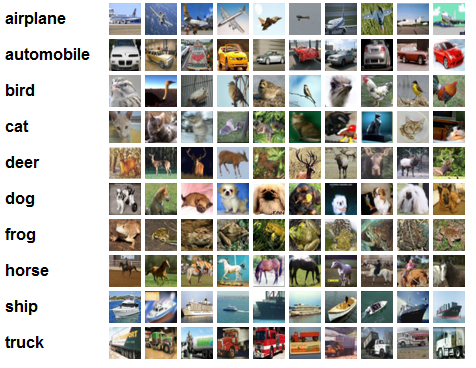

In [ ]:
# Importiamo le librerie necessarie
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10

## Caricamento e preparazione dei dati

In [ ]:
print("Caricamento del dataset CIFAR-10...")
# Non ci servono le etichette (y_train, y_test), quindi le ignoriamo con _.
(x_train_color, _), (x_test_color, _) = cifar10.load_data()

Caricamento del dataset CIFAR-10...
Forma dei dati di addestramento: (50000, 32, 32, 3)
Forma dei dati di test: (10000, 32, 32, 3)
Forma dei dati in bianco e nero: (50000, 32, 32, 1)


Normalizziamo i valori dei pixel delle immagini a colori tra 0 e 1.

I valori originali sono tra 0 e 255. Questo aiuta la rete ad apprendere meglio.

In [ ]:
x_train_color = x_train_color.astype('float32') / 255.0
x_test_color = x_test_color.astype('float32') / 255.0

print(f"Forma dei dati di addestramento: {x_train_color.shape}")
print(f"Forma dei dati di test: {x_test_color.shape}")

Ora, creiamo la versione in bianco e nero (scala di grigi) delle nostre immagini. Useremo queste come input per la nostra rete.

La funzione `rgb_to_grayscale` di TensorFlow converte un'immagine a 3 canali (RGB)
in una a 1 canale (scala di grigi).

In [ ]:
x_train_gray = tf.image.rgb_to_grayscale(x_train_color)
x_test_gray = tf.image.rgb_to_grayscale(x_test_color)

print(f"Forma dei dati in bianco e nero: {x_train_gray.shape}")

## Autoencoder

La nostra rete sarà un "Autoencoder". È un tipo di rete neurale bravo a
imparare a comprimere e poi a ricostruire i dati.

La useremo per "ricostruire" i colori partendo da un'immagine in bianco e nero.

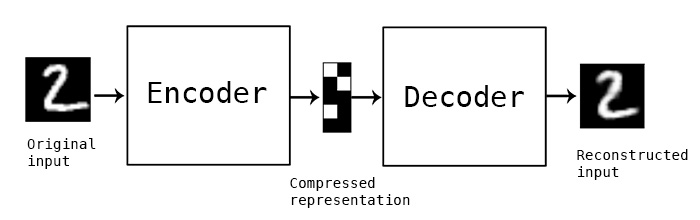

In [ ]:
# Definiamo l'input della rete: immagini 32x32 in bianco e nero (1 canale).
input_img = Input(shape=(32, 32, 1))

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 3)      │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 297,603 (1.14 MB)

 Trainable params: 297,603 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

## Encoder

Questa parte della rete impara a "comprimere" l'informazione dell'immagine.

In [ ]:
# Strato convoluzionale: cerca pattern nell'immagine.
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x) # Rimpicciolisce l'immagine
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x) # Rimpicciolisce ancora

## Decoder

Questa parte impara a "ricostruire" l'immagine a colori partendo dalla versione compressa.

In [ ]:
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x) # Ingrandisce l'immagine
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x) # Riporta alla dimensione originale

## Output

In [ ]:
# Strato di output: produce un'immagine 32x32 con 3 canali (RGB).
# Usiamo 'sigmoid' come attivazione perché produce valori tra 0 e 1, proprio come le nostre immagini normalizzate.
output_img = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Creiamo il modello finale
# L'input è l'immagine in bianco e nero (input_img)
# L'output è l'immagine a colori che la rete ha generato (output_img)
autoencoder = Model(input_img, output_img)

# Compiliamo il modello
# 'optimizer' è l'algoritmo che aggiorna la rete per farla migliorare. 'adam' è una scelta comune.
# 'loss' è la funzione che misura quanto la previsione della rete è sbagliata.
# Vogliamo minimizzare l'errore quadratico medio tra l'immagine predetta e quella reale.
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Stampiamo un riassunto della struttura della nostra rete.
autoencoder.summary()

## Training

Ora addestriamo il modello.
Diamo alla rete le immagini in bianco e nero (x_train_gray) come input
e le diciamo che l'output corretto sono le immagini a colori (x_train_color).

La rete imparerà a trasformare le prime nelle seconde.

In [ ]:
print("\nInizio dell'addestramento...")

autoencoder.fit(x_train_gray, x_train_color,
                epochs=20,          # Un'epoca è un passaggio completo su tutto il dataset. 20 è un buon inizio.
                batch_size=128,     # Addestriamo la rete su 128 immagini alla volta.
                shuffle=True,       # Mescoliamo i dati ad ogni epoca per migliorare l'apprendimento.
                validation_data=(x_test_gray, x_test_color)) # Usiamo i dati di test per vedere come sta andando.

print("Addestramento completato!")


Inizio dell'addestramento...
Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - loss: 0.0229 - val_loss: 0.0099
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0092 - val_loss: 0.0085
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0085 - val_loss: 0.0084
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0080 - val_loss: 0.0079
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0076 - val_loss: 0.0075
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0073 - val_loss: 0.0071
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0072 - val_loss: 0.0069
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.0070 - val_loss: 0.0069
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0070 - val_loss: 0.0069
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0068 - val_loss: 0.0067
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0067 - val_loss: 0.0066
Epoch 12/

## Testiamo la rete

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


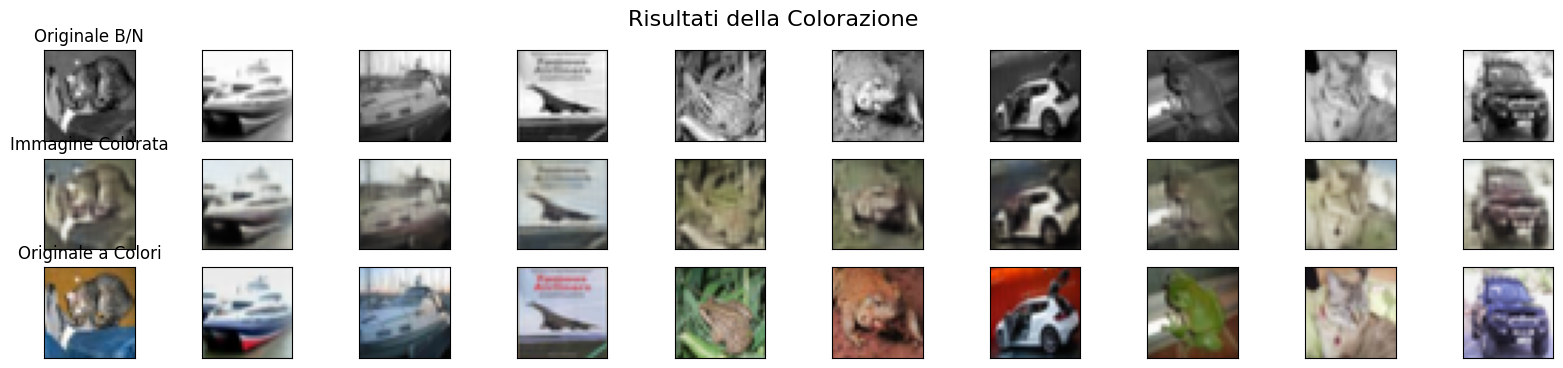

In [ ]:
# Ora usiamo il modello addestrato per colorare le immagini di test in bianco e nero.
decoded_imgs = autoencoder.predict(x_test_gray)

# Scegliamo quante immagini visualizzare
n = 10
plt.figure(figsize=(20, 4)) # Creiamo una figura grande per contenere le immagini

for i in range(n):
    # Immagine originale in bianco e nero (input)
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(tf.squeeze(x_test_gray[i]), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title("Originale B/N")

    # Immagine colorata dalla rete (output)
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title("Immagine Colorata")

    # Immagine originale a colori (riferimento)
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test_color[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title("Originale a Colori")

plt.suptitle("Risultati della Colorazione", fontsize=16)
plt.show()

## Coloriamo l'immagine


Colorazione di una nuova immagine...
Forma dell'immagine di input per il modello: (1, 32, 32, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


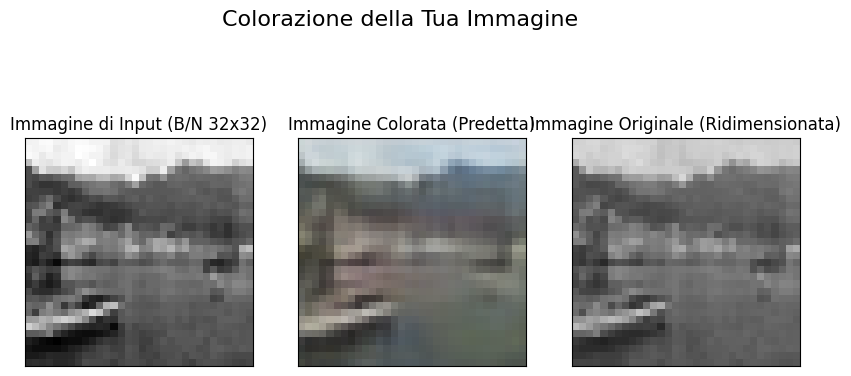

Colorazione completata e visualizzata!


In [ ]:
print("\nColorazione di una nuova immagine...")

# 1. Carica l'immagine che vuoi colorare
# Assicurati che l'immagine sia nella stessa cartella dello script
# o fornisci il percorso completo al file.
from tensorflow.keras.preprocessing import image
from PIL import Image # Per ridimensionare l'immagine se necessario

# Carica l'immagine
img_path = 'vista_messina.jpg' # <<<<<< CAMBIA QUI CON IL NOME DEL TUO FILE IMMAGINE
img = Image.open(img_path).convert('RGB') # Carica come RGB per poterla convertire in grigio

# 2. Prepara l'immagine per la rete neurale
# Il nostro modello è stato addestrato su immagini 32x32.
# Ridimensioniamo l'immagine caricata a 32x32 pixel.
# Nota: ridimensionare un'immagine grande a 32x32 la renderà molto piccola e perderà molti dettagli.
# I risultati della colorazione potrebbero non essere ottimali a questa risoluzione.
# Per risultati migliori, avresti bisogno di un modello addestrato su immagini ad alta risoluzione.
img_resized = img.resize((32, 32))
img_array = image.img_to_array(img_resized) # Converte in un array NumPy
img_array = img_array.astype('float32') / 255.0 # Normalizza i valori dei pixel tra 0 e 1

# Converti l'immagine a colori ridimensionata in scala di grigi per l'input del modello
# Aggiungiamo una dimensione per il batch (1, 32, 32, 3) e poi convertiamo in grigio.
input_for_model = tf.image.rgb_to_grayscale(np.expand_dims(img_array, axis=0))

print(f"Forma dell'immagine di input per il modello: {input_for_model.shape}")

# 3. Fai la previsione con il modello addestrato
colored_img = autoencoder.predict(input_for_model)

# Rimuovi la dimensione del batch per la visualizzazione (da 1, 32, 32, 3 a 32, 32, 3)
colored_img = colored_img[0]

# 4. Visualizza l'immagine colorata
plt.figure(figsize=(10, 5))

# Immagine originale in bianco e nero (come vista dal modello)
ax = plt.subplot(1, 3, 1)
plt.imshow(tf.squeeze(input_for_model[0]), cmap='gray')
plt.title("Immagine di Input (B/N 32x32)")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Immagine colorata dalla rete
ax = plt.subplot(1, 3, 2)
plt.imshow(colored_img)
plt.title("Immagine Colorata (Predetta)")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Immagine originale (per confronto, anche se a colori è stata convertita in grigio)
ax = plt.subplot(1, 3, 3)
plt.imshow(img_resized) # Mostriamo l'originale ridimensionata per confronto
plt.title("Immagine Originale (Ridimensionata)")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.suptitle("Colorazione della Tua Immagine", fontsize=16)
plt.show()

print("Colorazione completata e visualizzata!")

# Generative AI 🎨

Utilizza un modello di AI Generativa multimodale, nello specifico **Google Gemini**, per eseguire la colorazione tramite un semplice prompt testuale.

**Caratteristiche:**
- Approccio **Zero-Shot**: non richiede alcun addestramento.
- **Multimodale**: comprende sia l'immagine (input) che il testo (prompt).
- **Qualità elevata**: sfrutta un modello pre-addestrato su una vastissima quantità di dati.
- **Semplicità**: richiede solo poche righe di codice per la chiamata API.

In [2]:
from google import genai
from google.genai import types
from PIL import Image
from io import BytesIO

from google.colab import userdata
api_key = userdata.get('GEMINI_API_KEY')

client = genai.Client(api_key=api_key)

prompt = (
    "Colora questa foto"
)

image = Image.open('vista_messina.jpg')

response = client.models.generate_content(
    model="gemini-2.5-flash-image-preview",
    contents=[prompt, image],
)

for part in response.candidates[0].content.parts:
    if part.text is not None:
        print(part.text)
    elif part.inline_data is not None:
        image = Image.open(BytesIO(part.inline_data.data))
        image.save("generated_image.png")
        image.show()



Certamente! Ecco la foto colorata: 


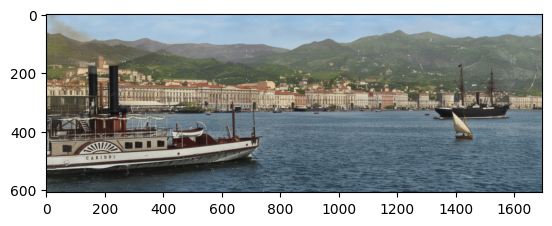

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('generated_image.png')
imgplot = plt.imshow(img)
plt.show()